In [1]:

# Import the required packages# Impor 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

In [2]:
test= pd.read_csv('new_test.csv')
train = pd.read_csv('new_train.csv')

In [3]:
train.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1


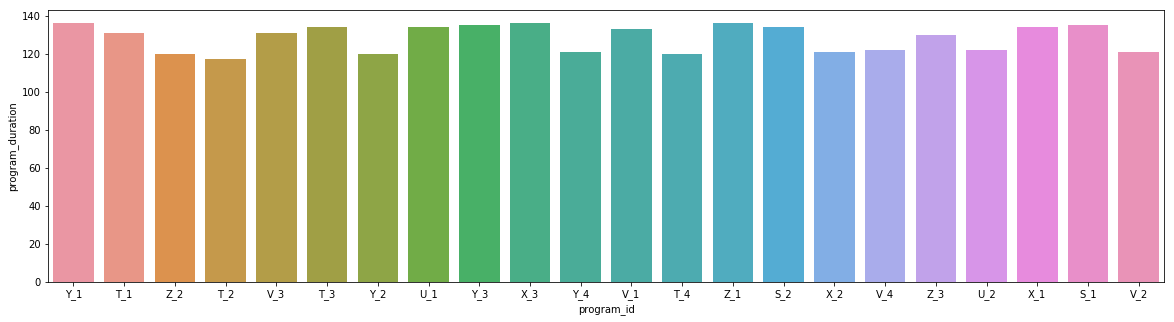

In [4]:

# program_id vs is_pass# progra 
plt.figure(figsize=(20,5))
sns.barplot(train['program_id'], train['program_duration'])

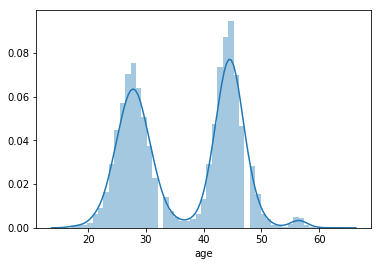

In [7]:
df=train.dropna()
sns.distplot(df['age']);

In [8]:

# Imputing missing value in age variable with median and in trainee_engagement_rating variable with mode of that variable.# Imputi 
train['age'].fillna(train['age'].median(), inplace=True)
train['trainee_engagement_rating'].fillna(train['trainee_engagement_rating'].mode()[0], inplace=True)
test['age'].fillna(train['age'].median(), inplace=True)
test['trainee_engagement_rating'].fillna(train['trainee_engagement_rating'].mode()[0], inplace=True)

In [11]:
#trainee_engagement_rating# Dropping id variables
train=train.drop(['id', 'trainee_id', 'test_id'], axis=1)
test=test.drop(['id', 'trainee_id', 'test_id'], axis=1)

In [12]:
# Save target variable in separate dataset
X = train.drop('is_pass',1)
y = train.is_pass

In [13]:
# Apply dummies to the dataset
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

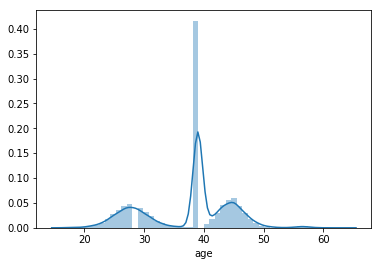

In [14]:
df=train.dropna()
sns.distplot(df['age']);

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

In [16]:

# Logistic regression using 5 fold stratified cross validation# Logist 
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = LogisticRegression(random_state=1)
     model.fit(xtr, ytr)
     pred=model.predict_proba(xvl)[:,1]
     score = roc_auc_score(yvl,pred)
     print('roc_auc_score',score)
     i+=1
# Making predictions for the test data
pred=model.predict_proba(test)[:,1]


1 of kfold 5
('roc_auc_score', 0.70010694084509428)

2 of kfold 5
('roc_auc_score', 0.69980577405566835)

3 of kfold 5
('roc_auc_score', 0.70125747371196434)

4 of kfold 5
('roc_auc_score', 0.71158532124938745)

5 of kfold 5
('roc_auc_score', 0.69998185343291741)


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(n_estimators=100,min_samples_leaf =5)
forest_model.fit(X, y)
melb_preds = forest_model.predict(test)

In [19]:
feature_importances = pd.DataFrame(forest_model.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
age,0.224693
trainee_engagement_rating,0.113700
city_tier,0.097528
total_programs_enrolled,0.091486
program_duration,0.048441
test_type_offline,0.034401
test_type_online,0.027871
program_type_U,0.027297
education_Matriculation,0.025001
gender_M,0.020735


In [19]:
from xgboost import XGBRegressor
my_model = XGBRegressor()
fit = my_model.fit(X,y,verbose= False)

In [20]:
predictions= my_model.predict(test)

In [21]:
pest=pd.read_csv('test_yjmNP1A.csv')

In [22]:
my_submission= pd.DataFrame({'id': pest.id, 'is_pass':predictions})
my_submission.to_csv('benchmark_xgboost.csv',index= False)